##### BMA:

We have tried BMA with correlation as feature selection method as follows:

1. BMA with correlation as feature selection method with p-value as < 0.95 (This selection has selected all genes. So this is equivaleny to No-feature selection since all genes were selected from the feature selection method)  - Prediction            accuracy - 67.02
    
2. BMA with correlation as feature selection method with p-value as < 0.25 (This selection has selected all genes. So this is equivaleny to No-feature selection since all genes were selected from the feature selection method) - Prediction          accuracy - 68.42
    
3. BMA with correlation as feature selection method with p-value as < 0.01 (Number of genes selected in feature selection -     1192) - Prediction accuracy - 68.24
    
4. BMA with correlation as feature selection method with p-value as < 0.05 (Number of genes selected in feature selection -     7707) - Prediction accuracy - 65.96
    
5. BMA with correlation as feature selection method with p-value as < 0.005 (Number of genes selected in feature selection -      576) - Prediction accuracy - 68.42
    
6. BMA with correlation as feature selection method with p-value as < 0.001 (Number of genes selected in feature selection -      106) - Prediction accuracy - 68.42


In [1]:
library(class)

In [2]:
library (ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [3]:

library (iterativeBMA)
library(pROC)
library (Biobase) 
library (BMA)

Loading required package: BMA
Loading required package: survival
Loading required package: leaps
Loading required package: robustbase

Attaching package: 'robustbase'

The following object is masked from 'package:survival':

    heart

Loading required package: inline
Loading required package: rrcov
Scalable Robust Estimators with High Breakdown Point (version 1.4-3)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call,

In [4]:
data <- read.delim("PC3_RMA_labels.txt")

In [5]:
dim(data)
data[1:5,22270:22278]

[1]   276 22278

AFFX.r2.P1.cre.3_at,AFFX.r2.P1.cre.5_at,AFFX.ThrX.3_at,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at,Label
14.58883,14.41516,5.328093,4.787588,4.833590,4.614942,4.537976,4.664314,1
14.18400,13.81357,5.479934,5.608054,5.216571,5.422156,4.883759,5.329954,1
14.11321,13.65796,5.513578,5.584934,5.310678,5.523111,5.046227,5.481926,0
13.80475,13.49202,4.937254,4.683656,4.591943,4.583175,4.377955,4.941050,1
12.47760,12.46260,3.244258,3.011891,2.818193,2.878322,2.825760,3.208905,0


###### Last column is label column. First 190 rows are training data and the remaining 86 data are test data. Test data does not have label data
###### Split the data into training_data and training_data_label

In [6]:
na.ind.labels <- which(is.na(data$Label))
length(na.ind.labels)

[1] 86

##### Training data

In [7]:
training_data  <- data[-na.ind.labels,-22278]
dim(training_data)
training_data[1:5,22270:22277]

[1]   190 22277

AFFX.r2.P1.cre.3_at,AFFX.r2.P1.cre.5_at,AFFX.ThrX.3_at,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at
14.58883,14.41516,5.328093,4.787588,4.833590,4.614942,4.537976,4.664314
14.18400,13.81357,5.479934,5.608054,5.216571,5.422156,4.883759,5.329954
14.11321,13.65796,5.513578,5.584934,5.310678,5.523111,5.046227,5.481926
13.80475,13.49202,4.937254,4.683656,4.591943,4.583175,4.377955,4.941050
12.47760,12.46260,3.244258,3.011891,2.818193,2.878322,2.825760,3.208905


#### Label for Training data

In [8]:
training_data_label  <- data.frame(data[-na.ind.labels,22278])
dim(training_data_label)
training_data_label

[1] 190   1

data..na.ind.labels..22278.
1
1
0
1
0
0
1
1
1
1


#### Test data

In [9]:
test_data  <- data[na.ind.labels,-22278]
dim(test_data)
test_data[1:5,22270:22277]

[1]    86 22277

,AFFX.r2.P1.cre.3_at,AFFX.r2.P1.cre.5_at,AFFX.ThrX.3_at,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at
191,14.54871,14.26104,5.284418,5.042819,4.929295,4.999701,4.769721,5.023306
192,14.93217,14.35377,4.876677,4.543831,4.243698,4.322675,4.380935,4.400256
193,12.87484,12.69556,4.505898,4.493102,4.284225,4.577340,4.177343,4.416013
194,13.22302,12.70105,4.730601,4.619996,4.146032,4.339825,4.206135,4.861587
195,13.59059,13.23581,4.987098,5.043222,4.792481,5.024211,4.594230,5.277112


In [10]:
test_data[1:5,1:5]

,X1007_s_at,X1053_at,X117_at,X121_at,X1255_g_at
191,10.214544,9.022464,5.503321,7.015766,4.941998
192,9.258841,8.285384,4.976839,6.767669,4.169140
193,9.468441,7.831839,5.356279,6.606971,4.117631
194,8.675522,8.697248,5.261015,6.763120,4.461192
195,9.897426,9.060140,5.668446,6.612710,4.650444


#### test steps before applying in code

In [11]:
correlationVector = abs(apply (t(training_data), 1, function(x){cor (x, training_data_label)}))

In [12]:
correlationVector[22270:22277]

AFFX.r2.P1.cre.3_at AFFX.r2.P1.cre.5_at      AFFX.ThrX.3_at      AFFX.ThrX.5_at 
        0.005038361         0.002170363         0.046347802         0.028685492 
     AFFX.ThrX.M_at     AFFX.TrpnX.3_at     AFFX.TrpnX.5_at     AFFX.TrpnX.M_at 
        0.037764424         0.041732157         0.061862979         0.008229130

In [13]:
correlatedColumns = names(correlationVector[correlationVector >= quantile(correlationVector, prob=1-25/100)])
length(correlatedColumns)

[1] 5570

In [14]:
correlationVector1 = abs(apply(training_data, 2, function(x) {cor(unlist(x), unlist(training_data_label))}))
length(correlationVector1)
correlationVector1[22270:22277]

[1] 22277

AFFX.r2.P1.cre.3_at AFFX.r2.P1.cre.5_at      AFFX.ThrX.3_at      AFFX.ThrX.5_at 
        0.005038361         0.002170363         0.046347802         0.028685492 
     AFFX.ThrX.M_at     AFFX.TrpnX.3_at     AFFX.TrpnX.5_at     AFFX.TrpnX.M_at 
        0.037764424         0.041732157         0.061862979         0.008229130

In [15]:
correlationVector = abs(apply (t(training_data), 1, function(x){cor (x, training_data_label)}))

In [16]:
correlatedColumns <- c(which (correlationVector < 0.001))
length(correlatedColumns)

[1] 106

##### K-Fold validation

In [17]:
#BMA with correlation as feature selection with p value < 0.005
Correlation0.005BMA = function(xDataRaw, yDataRaw) {
  kFolds = 10
  repeats = 3

  folds = cut(seq(1, nrow(xDataRaw)), breaks=kFolds, labels=FALSE);
  yDataRaw = yDataRaw[rownames(xDataRaw), , drop=FALSE]

  #Creat prediction dataframe to save result of each round
  accuracies = c()
    
  for (r in 1:repeats) {
    # Feature Selection based on correaltion
    #correlationVector = abs(apply(xDataRaw, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
    correlationVector = abs(apply (t(xDataRaw), 1, function(x){cor (x, yDataRaw)}))
    correlatedColumns <- c(which (correlationVector < 0.005))

    # Shuffle Data
    xData = xDataRaw[sample(nrow(xDataRaw)), correlatedColumns, drop=FALSE];
    # print(xData)
    yData = yDataRaw[rownames(xData), , drop=FALSE];

    #Creat prediction dataframe to save result of each round
    predictions = c()


    for (k in 1:kFolds) {
      testIndexes = which(folds == k, arr.ind=TRUE)
      xTestData = xData[testIndexes, , drop=FALSE]
      xTrainData = xData[-testIndexes, , drop=FALSE]
      yTrainData = yData[-testIndexes, , drop=FALSE]
      yTestData = yData[testIndexes, , drop=FALSE]
        
      

      results <-iterateBMAglm.train.predict (train.expr.set=ExpressionSet (assayData=t(xTrainData)), test.expr.set=ExpressionSet(assayData=t(xTestData)), train.class=unlist(yTrainData))
      results <- round(results)
        
      predictions = c(predictions, results)
    }
    accuracy = mean(predictions == unlist(yData))
    accuracies = c(accuracies, accuracy)
  }
  averageAccuracy = mean(accuracies)
  return(averageAccuracy)
}

In [18]:
#BMA with correlation as feature selection with p value < 0.001
Correlation0.001BMA = function(xDataRaw, yDataRaw) {
  kFolds = 10
  repeats = 3

  folds = cut(seq(1, nrow(xDataRaw)), breaks=kFolds, labels=FALSE);
  yDataRaw = yDataRaw[rownames(xDataRaw), , drop=FALSE]

  #Creat prediction dataframe to save result of each round
  accuracies = c()
    
  for (r in 1:repeats) {
    # Feature Selection based on correaltion
    #correlationVector = abs(apply(xDataRaw, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
    correlationVector = abs(apply (t(xDataRaw), 1, function(x){cor (x, yDataRaw)}))
    correlatedColumns <- c(which (correlationVector < 0.001))

    # Shuffle Data
    xData = xDataRaw[sample(nrow(xDataRaw)), correlatedColumns, drop=FALSE];
    # print(xData)
    yData = yDataRaw[rownames(xData), , drop=FALSE];

    #Creat prediction dataframe to save result of each round
    predictions = c()


    for (k in 1:kFolds) {
      testIndexes = which(folds == k, arr.ind=TRUE)
      xTestData = xData[testIndexes, , drop=FALSE]
      xTrainData = xData[-testIndexes, , drop=FALSE]
      yTrainData = yData[-testIndexes, , drop=FALSE]
      yTestData = yData[testIndexes, , drop=FALSE]
        
      

      results <-iterateBMAglm.train.predict (train.expr.set=ExpressionSet (assayData=t(xTrainData)), test.expr.set=ExpressionSet(assayData=t(xTestData)), train.class=unlist(yTrainData))
      results <- round(results)
        
      predictions = c(predictions, results)
    }
    accuracy = mean(predictions == unlist(yData))
    accuracies = c(accuracies, accuracy)
  }
  averageAccuracy = mean(accuracies)
  return(averageAccuracy)
}

In [19]:
#BMA with correlation as feature selection with p value < 0.05
Correlation0.05BMA = function(xDataRaw, yDataRaw) {
  kFolds = 10
  repeats = 3

  folds = cut(seq(1, nrow(xDataRaw)), breaks=kFolds, labels=FALSE);
  yDataRaw = yDataRaw[rownames(xDataRaw), , drop=FALSE]

  #Creat prediction dataframe to save result of each round
  accuracies = c()
    
  for (r in 1:repeats) {
    # Feature Selection based on correaltion
    #correlationVector = abs(apply(xDataRaw, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
    correlationVector = abs(apply (t(xDataRaw), 1, function(x){cor (x, yDataRaw)}))
    correlatedColumns <- c(which (correlationVector < 0.05))

    # Shuffle Data
    xData = xDataRaw[sample(nrow(xDataRaw)), correlatedColumns, drop=FALSE];
    # print(xData)
    yData = yDataRaw[rownames(xData), , drop=FALSE];

    #Creat prediction dataframe to save result of each round
    predictions = c()


    for (k in 1:kFolds) {
      testIndexes = which(folds == k, arr.ind=TRUE)
      xTestData = xData[testIndexes, , drop=FALSE]
      xTrainData = xData[-testIndexes, , drop=FALSE]
      yTrainData = yData[-testIndexes, , drop=FALSE]
      yTestData = yData[testIndexes, , drop=FALSE]
        
      

      results <-iterateBMAglm.train.predict (train.expr.set=ExpressionSet (assayData=t(xTrainData)), test.expr.set=ExpressionSet(assayData=t(xTestData)), train.class=unlist(yTrainData))
      results <- round(results)
        
      predictions = c(predictions, results)
    }
    accuracy = mean(predictions == unlist(yData))
    accuracies = c(accuracies, accuracy)
  }
  averageAccuracy = mean(accuracies)
  return(averageAccuracy)
}

In [20]:
#BMA with correlation as feature selection with p value < 0.01
Correlation0.01BMA = function(xDataRaw, yDataRaw) {
  kFolds = 10
  repeats = 3

  folds = cut(seq(1, nrow(xDataRaw)), breaks=kFolds, labels=FALSE);
  yDataRaw = yDataRaw[rownames(xDataRaw), , drop=FALSE]

  #Creat prediction dataframe to save result of each round
  accuracies = c()
    
  for (r in 1:repeats) {
    # Feature Selection based on correaltion
    #correlationVector = abs(apply(xDataRaw, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
    correlationVector = abs(apply (t(xDataRaw), 1, function(x){cor (x, yDataRaw)}))
    correlatedColumns <- c(which (correlationVector < 0.01))

    # Shuffle Data
    xData = xDataRaw[sample(nrow(xDataRaw)), correlatedColumns, drop=FALSE];
    # print(xData)
    yData = yDataRaw[rownames(xData), , drop=FALSE];

    #Creat prediction dataframe to save result of each round
    predictions = c()


    for (k in 1:kFolds) {
      testIndexes = which(folds == k, arr.ind=TRUE)
      xTestData = xData[testIndexes, , drop=FALSE]
      xTrainData = xData[-testIndexes, , drop=FALSE]
      yTrainData = yData[-testIndexes, , drop=FALSE]
      yTestData = yData[testIndexes, , drop=FALSE]
        
      

      results <-iterateBMAglm.train.predict (train.expr.set=ExpressionSet (assayData=t(xTrainData)), test.expr.set=ExpressionSet(assayData=t(xTestData)), train.class=unlist(yTrainData))
      results <- round(results)
        
      predictions = c(predictions, results)
    }
    accuracy = mean(predictions == unlist(yData))
    accuracies = c(accuracies, accuracy)
  }
  averageAccuracy = mean(accuracies)
  return(averageAccuracy)
}

In [21]:
#BMA with correlation as feature selection with p value < 0.95
HighCorrelation10BMA = function(xDataRaw, yDataRaw) {
  kFolds = 10
  repeats = 3

  folds = cut(seq(1, nrow(xDataRaw)), breaks=kFolds, labels=FALSE);
  yDataRaw = yDataRaw[rownames(xDataRaw), , drop=FALSE]

  #Creat prediction dataframe to save result of each round
  accuracies = c()
    
  for (r in 1:repeats) {
    # Feature Selection based on correaltion
    #correlationVector = abs(apply(xDataRaw, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
    correlationVector = abs(apply (t(xDataRaw), 1, function(x){cor (x, yDataRaw)}))
    correlatedColumns <- c(which (correlationVector < 0.95))

    # Shuffle Data
    xData = xDataRaw[sample(nrow(xDataRaw)), correlatedColumns, drop=FALSE];
    # print(xData)
    yData = yDataRaw[rownames(xData), , drop=FALSE];

    #Creat prediction dataframe to save result of each round
    predictions = c()


    for (k in 1:kFolds) {
      testIndexes = which(folds == k, arr.ind=TRUE)
      xTestData = xData[testIndexes, , drop=FALSE]
      xTrainData = xData[-testIndexes, , drop=FALSE]
      yTrainData = yData[-testIndexes, , drop=FALSE]
      yTestData = yData[testIndexes, , drop=FALSE]
        
      

      results <-iterateBMAglm.train.predict (train.expr.set=ExpressionSet (assayData=t(xTrainData)), test.expr.set=ExpressionSet(assayData=t(xTestData)), train.class=unlist(yTrainData))
      results <- round(results)
        
      predictions = c(predictions, results)
    }
    accuracy = mean(predictions == unlist(yData))
    accuracies = c(accuracies, accuracy)
  }
  averageAccuracy = mean(accuracies)
  return(averageAccuracy)
}

In [22]:
#BMA with correlation as feature selection with p value < 0.75
LowCorrelation10BMA = function(xDataRaw, yDataRaw) {
  kFolds = 10
  repeats = 3

  folds = cut(seq(1, nrow(xDataRaw)), breaks=kFolds, labels=FALSE);
  yDataRaw = yDataRaw[rownames(xDataRaw), , drop=FALSE]

  #Creat prediction dataframe to save result of each round
  accuracies = c()
    
  for (r in 1:repeats) {
    # Feature Selection based on correaltion
    #correlationVector = abs(apply(xDataRaw, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
    correlationVector = abs(apply (t(xDataRaw), 1, function(x){cor (x, yDataRaw)}))
    correlatedColumns <- c(which (correlationVector < 0.75))

    # Shuffle Data
    xData = xDataRaw[sample(nrow(xDataRaw)), correlatedColumns, drop=FALSE];
    # print(xData)
    yData = yDataRaw[rownames(xData), , drop=FALSE];

    #Creat prediction dataframe to save result of each round
    predictions = c()


    for (k in 1:kFolds) {
      testIndexes = which(folds == k, arr.ind=TRUE)
      xTestData = xData[testIndexes, , drop=FALSE]
      xTrainData = xData[-testIndexes, , drop=FALSE]
      yTrainData = yData[-testIndexes, , drop=FALSE]
      yTestData = yData[testIndexes, , drop=FALSE]
        
      

      results <-iterateBMAglm.train.predict (train.expr.set=ExpressionSet (assayData=t(xTrainData)), test.expr.set=ExpressionSet(assayData=t(xTestData)), train.class=unlist(yTrainData))
      results <- round(results)
        
      predictions = c(predictions, results)
    }
    accuracy = mean(predictions == unlist(yData))
    accuracies = c(accuracies, accuracy)
  }
  averageAccuracy = mean(accuracies)
  return(averageAccuracy)
}

In [23]:
 set.seed(42)

 methodNames = c("Correlation0.001BMA","Correlation0.005BMA","Correlation0.05BMA","Correlation0.01BMA","LowCorrelation10BMA","HighCorrelation10BMA")
 methods =  c(Correlation0.001BMA,Correlation0.005BMA,Correlation0.05BMA,Correlation0.01BMA,LowCorrelation10BMA,HighCorrelation10BMA)

    output <-data.frame()
    accuarcies = c()

for (method in methods) {
      
      result<-method(training_data, training_data_label)
      accuarcies = c(accuarcies, result)
     
    }

output <- rbind(output,accuarcies)
colnames(output) = methodNames
write.csv(output, file="projecttrial.csv")

[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"
[1] "5: explored up to variable ## 100"


##### ROCR Package

We got 68% prediction accuracy with different set of combinations. i.e when p-value was selected as < 0.001, 0.005, 0.01, 0.25

Though the number of genes selected from these combinations are different, still we got similar and higher prediction accuracy for these combinations.

Hence, we plotted graphs using ROCR package for three measures - 1. auc (area under curve), 2. Precision Vs Recall, 3. True positive Rate(TPR) vs False Positive Rate (FPR) for these four combinations (p-value < 0.001,<0.01,<0.25,0.005 )

#### From the plotted graphs the area under the curve (AUC) is higher for the combination p < 0.25 which is good compared to other BMA combinations

###### ROCR - BMA Combination 1 - p value < 0.001

In [24]:
correlationVector = abs(apply (t(training_data), 1, function(x){cor (x, training_data_label)}))
correlatedColumns <- c(which (correlationVector < 0.001))
length(correlatedColumns)

[1] 106

In [25]:
ret.bic.glm <-iterateBMAglm.train.predict (train.expr.set=ExpressionSet (assayData=t(training_data[,correlatedColumns])), test.expr.set=ExpressionSet(assayData=t(training_data[,correlatedColumns])), train.class=unlist(training_data_label))

[1] "5: explored up to variable ## 100"


In [26]:
roc.ret.assessment <- prediction (ret.bic.glm, as.numeric(unname(unlist(training_data_label)))) 
roc.ret.assessment

An object of class "prediction"
Slot "predictions":
[[1]]
        1         2         3         4         5         6         7         8 
0.6841769 0.6841908 0.6842092 0.6841998 0.6842277 0.6841996 0.6842274 0.6842115 
        9        10        11        12        13        14        15        16 
0.6841794 0.6842162 0.6842284 0.6842521 0.6841590 0.6841841 0.6841946 0.6841885 
       17        18        19        20        21        22        23        24 
0.6841960 0.6841999 0.6842489 0.6841744 0.6842154 0.6841791 0.6842226 0.6841925 
       25        26        27        28        29        30        31        32 
0.6842047 0.6842005 0.6841801 0.6842084 0.6842172 0.6842199 0.6842201 0.6842010 
       33        34        35        36        37        38        39        40 
0.6842538 0.6842170 0.6842149 0.6842180 0.6842162 0.6842226 0.6841939 0.6841857 
       41        42        43        44        45        46        47        48 
0.6842046 0.6841850 0.6841903 0.6841777 0.6842496 0

In [27]:
rocr.perf <- performance(roc.ret.assessment,measure="auc")     
rocr.perf

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.5234615


Slot "alpha.values":
list()


In [28]:
rocr.auc <- rocr.perf@y.values[[1]]
rocr.auc

[1] 0.5234615

In [29]:
perc.rec <- performance(roc.ret.assessment, "prec", "rec")


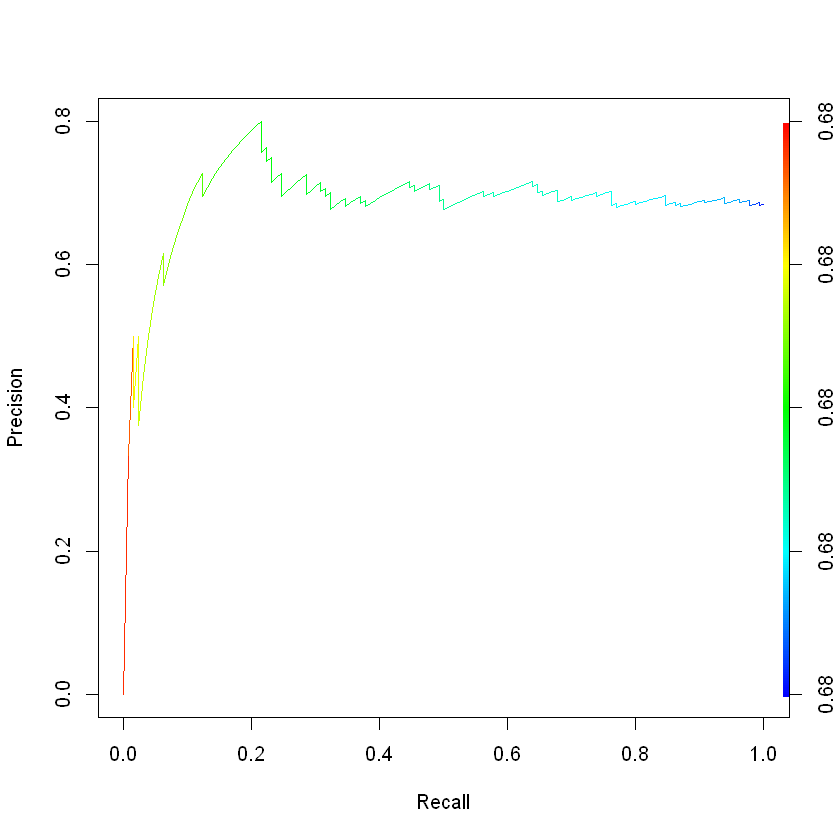

In [30]:
plot(perc.rec,colorize=TRUE)

In [31]:
tpr.fpr <- performance(roc.ret.assessment,"tpr","fpr")


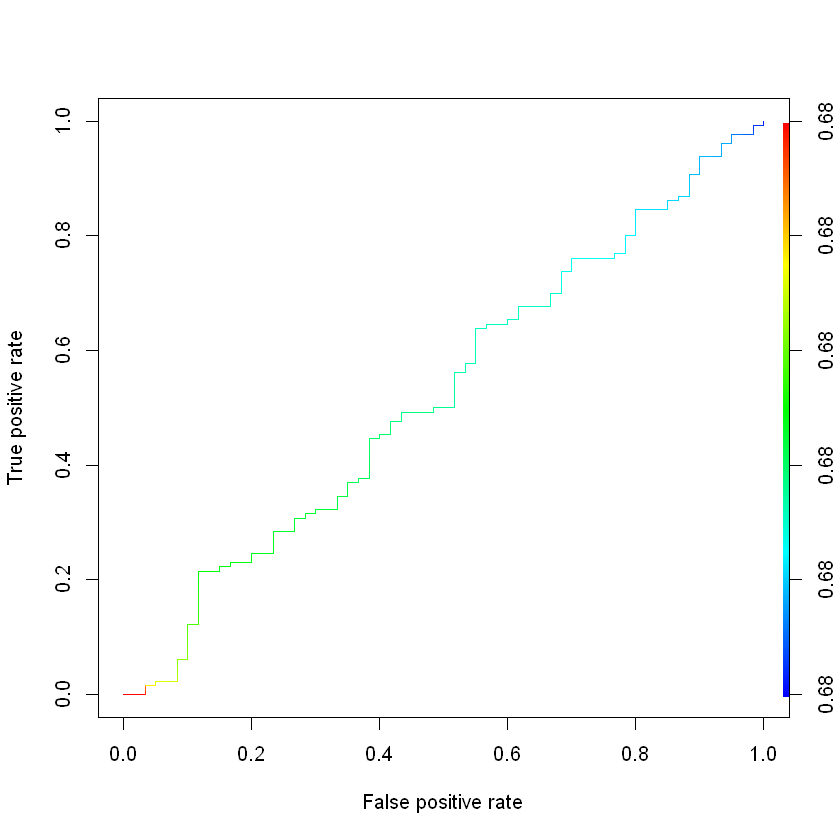

In [32]:
plot(tpr.fpr,colorize=TRUE)


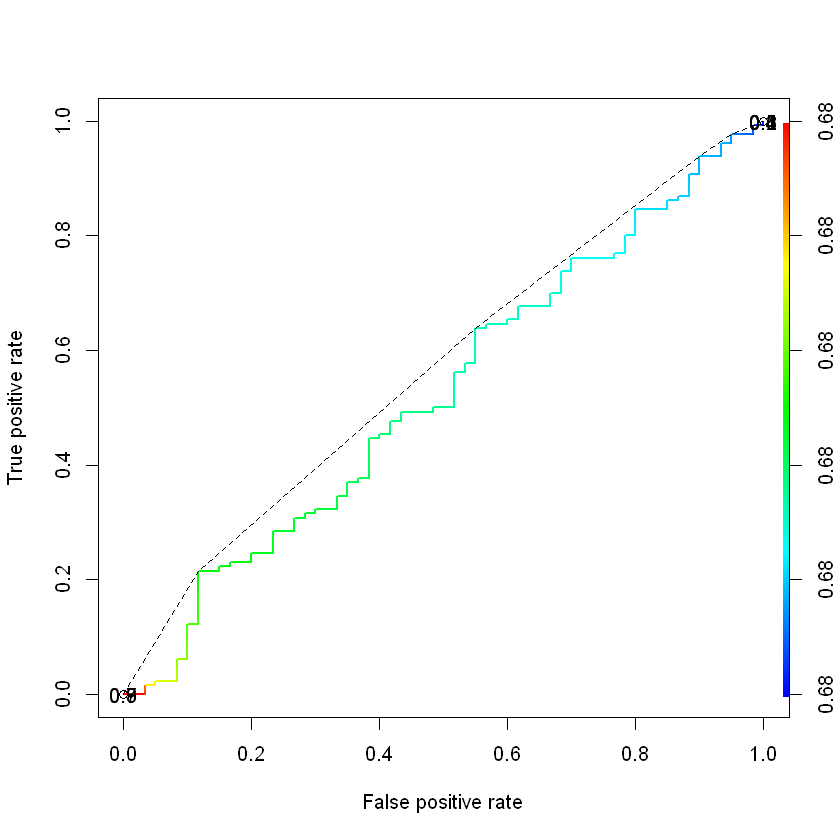

In [33]:
## Draw ROC curve
ROCR::plot(tpr.fpr, colorize = TRUE, print.cutoffs.at = seq(0.1, 0.9, 0.1), lwd = 2)

## Draw convex hull of ROC curve
ch1 = ROCR::performance(roc.ret.assessment, "rch")
ROCR::plot(ch1, add = TRUE, lty = 2)

###### ROCR - BMA Combination 2 - p value < 0.25

In [34]:
correlationVector = abs(apply (t(training_data), 1, function(x){cor (x, training_data_label)}))
correlatedColumns2 <- c(which (correlationVector < 0.25))
length(correlatedColumns2)

[1] 22270

In [35]:
ret.bic.glm2 <-iterateBMAglm.train.predict (train.expr.set=ExpressionSet (assayData=t(training_data[,correlatedColumns2])), test.expr.set=ExpressionSet(assayData=t(training_data[,correlatedColumns2])), train.class=unlist(training_data_label))

[1] "6: explored up to variable ## 100"


In [36]:
roc.ret.assessment2 <- prediction (ret.bic.glm2, as.numeric(unname(unlist(training_data_label)))) 
roc.ret.assessment2

An object of class "prediction"
Slot "predictions":
[[1]]
        1         2         3         4         5         6         7         8 
0.6860720 0.7567891 0.6890676 0.7584485 0.3945428 0.5426021 0.6711294 0.8271471 
        9        10        11        12        13        14        15        16 
0.5816529 0.5975292 0.7061563 0.5286611 0.7138586 0.5080365 0.6694722 0.7801398 
       17        18        19        20        21        22        23        24 
0.7426136 0.6609111 0.6694800 0.5125483 0.6664321 0.7414553 0.4219513 0.7243659 
       25        26        27        28        29        30        31        32 
0.7483196 0.6701525 0.8008824 0.7960226 0.4375291 0.7197205 0.7896631 0.8389377 
       33        34        35        36        37        38        39        40 
0.7785573 0.7569725 0.7117997 0.7925120 0.7576932 0.6970188 0.7301399 0.4664089 
       41        42        43        44        45        46        47        48 
0.7793421 0.5520435 0.6926596 0.7138318 0.8171260 0

In [37]:
rocr.perf2 <- performance(roc.ret.assessment2,measure="auc")     
rocr.perf2

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6715385


Slot "alpha.values":
list()


In [38]:
rocr.auc2 <- rocr.perf2@y.values[[1]]
rocr.auc2

[1] 0.6715385

In [39]:
perc.rec2 <- performance(roc.ret.assessment2, "prec", "rec")


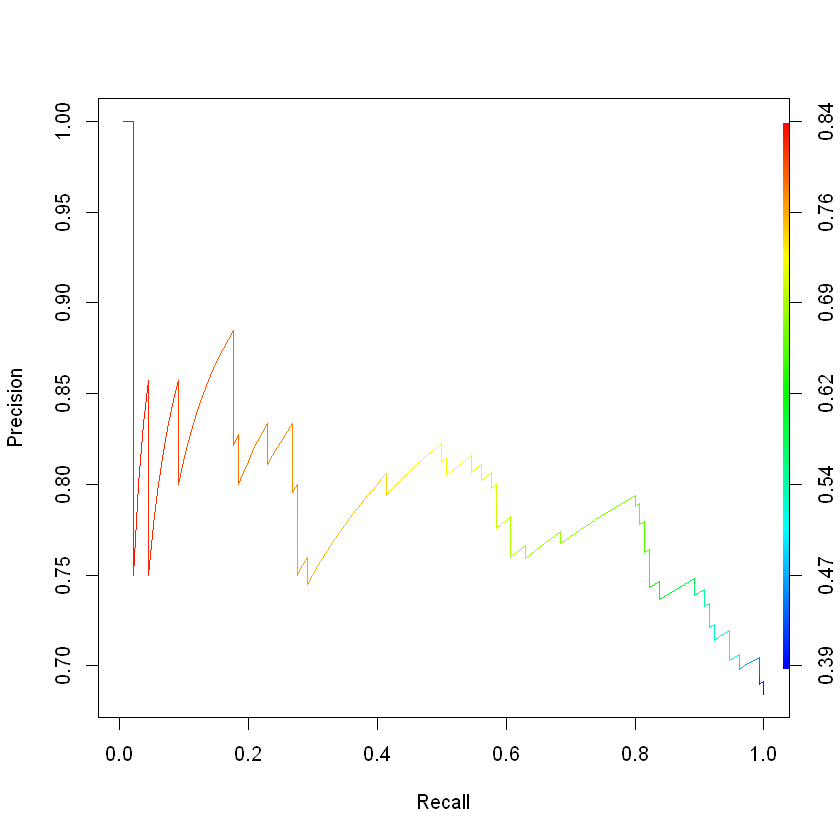

In [40]:
plot(perc.rec2,colorize=TRUE)

In [41]:
tpr.fpr2 <- performance(roc.ret.assessment2,"tpr","fpr")


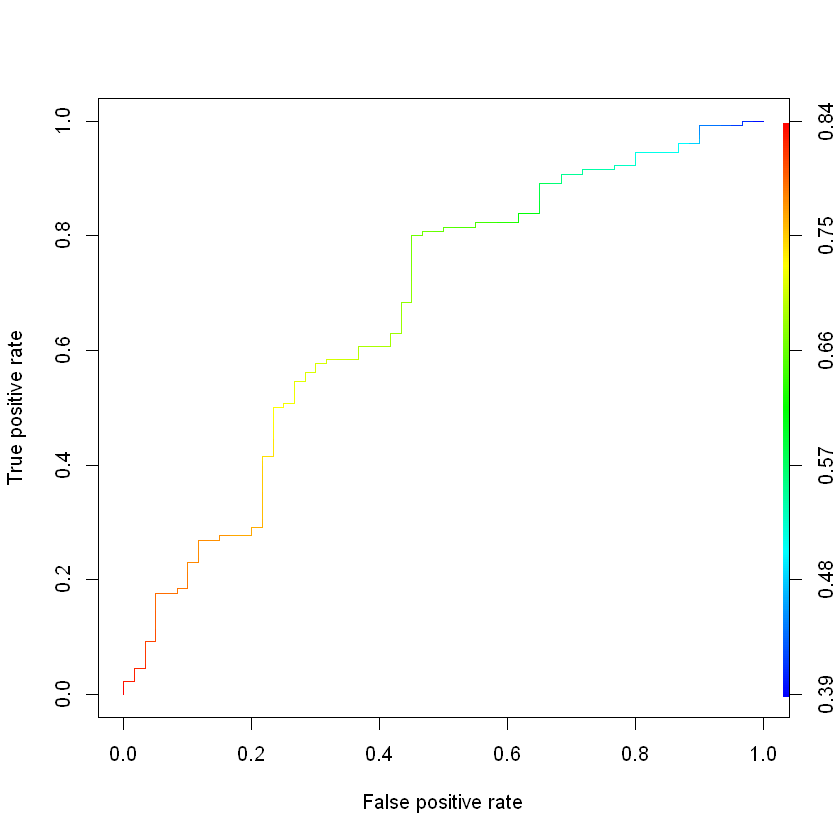

In [42]:
plot(tpr.fpr2,colorize=TRUE)


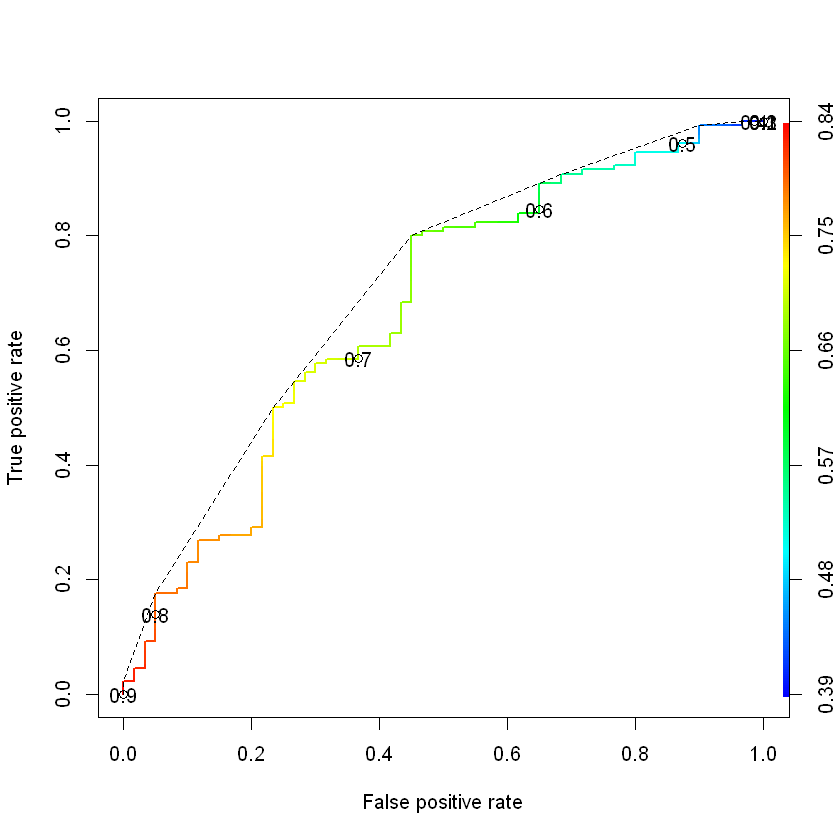

In [43]:
## Draw ROC curve
ROCR::plot(tpr.fpr2, colorize = TRUE, print.cutoffs.at = seq(0.1, 0.9, 0.1), lwd = 2)

## Draw convex hull of ROC curve
ch2 = ROCR::performance(roc.ret.assessment2, "rch")
ROCR::plot(ch2, add = TRUE, lty = 2)

###### ROCR - BMA Combination 3 - p value < 0.01

In [44]:
correlationVector = abs(apply (t(training_data), 1, function(x){cor (x, training_data_label)}))
correlatedColumns3 <- c(which (correlationVector < 0.01))
length(correlatedColumns3)

[1] 1192

In [45]:
ret.bic.glm3 <-iterateBMAglm.train.predict (train.expr.set=ExpressionSet (assayData=t(training_data[,correlatedColumns3])), test.expr.set=ExpressionSet(assayData=t(training_data[,correlatedColumns3])), train.class=unlist(training_data_label))

[1] "5: explored up to variable ## 100"


In [46]:
roc.ret.assessment3 <- prediction (ret.bic.glm3, as.numeric(unname(unlist(training_data_label)))) 
roc.ret.assessment3

An object of class "prediction"
Slot "predictions":
[[1]]
        1         2         3         4         5         6         7         8 
0.6851498 0.6862425 0.6859624 0.6849561 0.6803832 0.6836143 0.6848187 0.6824334 
        9        10        11        12        13        14        15        16 
0.6836542 0.6841617 0.6862207 0.6833042 0.6857855 0.6828116 0.6850599 0.6826744 
       17        18        19        20        21        22        23        24 
0.6861546 0.6850612 0.6855882 0.6830682 0.6841083 0.6813118 0.6805107 0.6853515 
       25        26        27        28        29        30        31        32 
0.6847251 0.6843608 0.6848940 0.6819026 0.6805755 0.6849801 0.6862034 0.6863060 
       33        34        35        36        37        38        39        40 
0.6825679 0.6843344 0.6848820 0.6827894 0.6857675 0.6848251 0.6849115 0.6796363 
       41        42        43        44        45        46        47        48 
0.6821744 0.6829992 0.6854596 0.6851758 0.6832810 0

In [47]:
rocr.perf3 <- performance(roc.ret.assessment3,measure="auc")     
rocr.perf3

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.4888462


Slot "alpha.values":
list()


In [48]:
rocr.auc3 <- rocr.perf3@y.values[[1]]
rocr.auc3

[1] 0.4888462

In [49]:
perc.rec3 <- performance(roc.ret.assessment3, "prec", "rec")


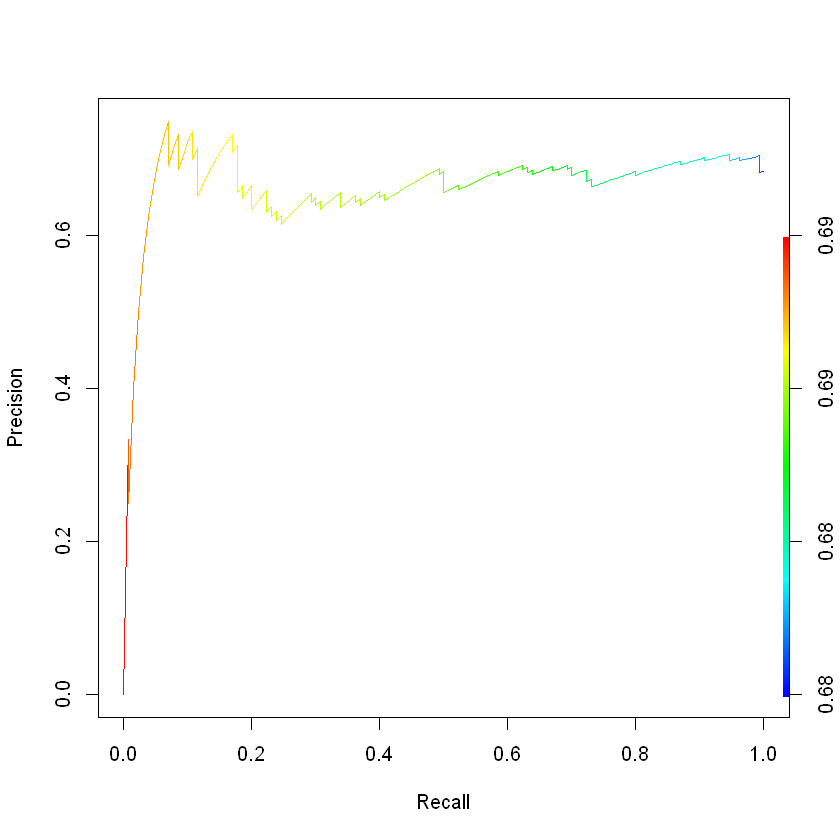

In [50]:
plot(perc.rec3,colorize=TRUE)

In [51]:
tpr.fpr3 <- performance(roc.ret.assessment3,"tpr","fpr")


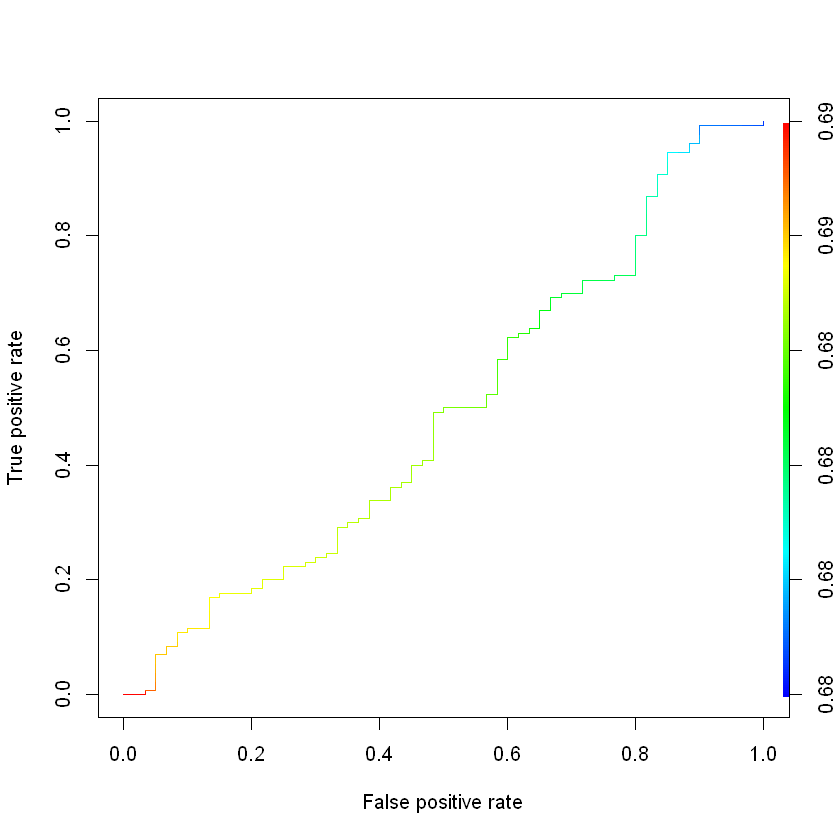

In [52]:
plot(tpr.fpr3,colorize=TRUE)


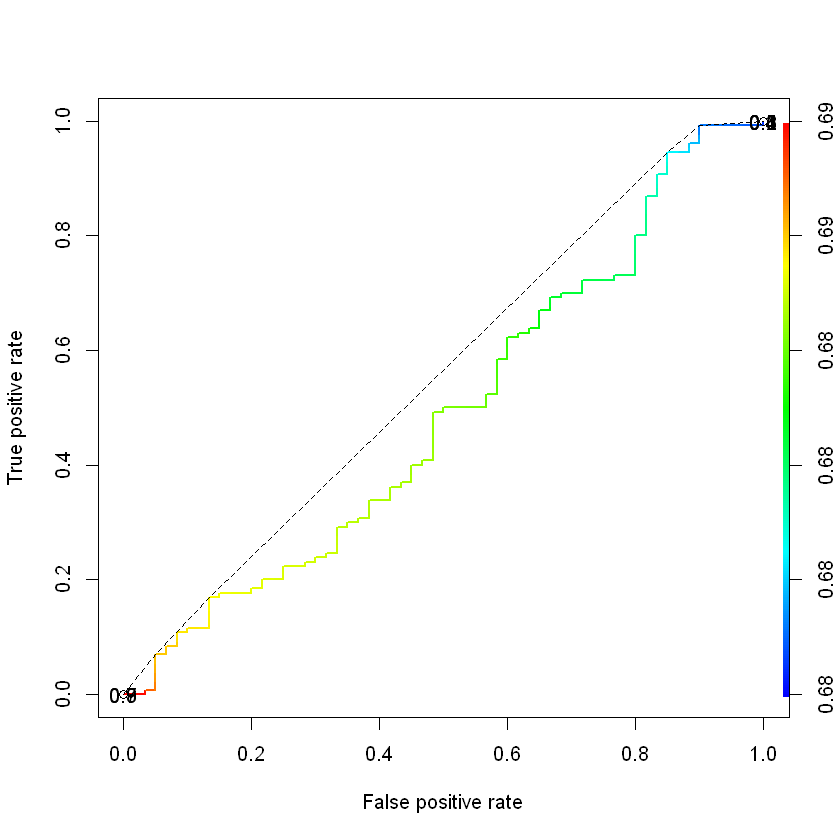

In [53]:
## Draw ROC curve
ROCR::plot(tpr.fpr3, colorize = TRUE, print.cutoffs.at = seq(0.1, 0.9, 0.1), lwd = 2)

## Draw convex hull of ROC curve
ch3 = ROCR::performance(roc.ret.assessment3, "rch")
ROCR::plot(ch3, add = TRUE, lty = 2)

###### ROCR - BMA Combination 4 - p value < 0.005

In [54]:
correlationVector = abs(apply (t(training_data), 1, function(x){cor (x, training_data_label)}))
correlatedColumns4 <- c(which (correlationVector < 0.005))
length(correlatedColumns4)

[1] 576

In [55]:
ret.bic.glm4 <-iterateBMAglm.train.predict (train.expr.set=ExpressionSet (assayData=t(training_data[,correlatedColumns4])), test.expr.set=ExpressionSet(assayData=t(training_data[,correlatedColumns4])), train.class=unlist(training_data_label))

[1] "5: explored up to variable ## 100"


In [56]:
roc.ret.assessment4 <- prediction (ret.bic.glm4, as.numeric(unname(unlist(training_data_label)))) 
roc.ret.assessment4

An object of class "prediction"
Slot "predictions":
[[1]]
        1         2         3         4         5         6         7         8 
0.6841066 0.6840232 0.6844018 0.6842719 0.6840363 0.6844439 0.6839895 0.6841853 
        9        10        11        12        13        14        15        16 
0.6845023 0.6844084 0.6839320 0.6840230 0.6840184 0.6842533 0.6843116 0.6843237 
       17        18        19        20        21        22        23        24 
0.6840982 0.6840586 0.6839717 0.6844788 0.6842909 0.6841964 0.6840055 0.6841746 
       25        26        27        28        29        30        31        32 
0.6843800 0.6842598 0.6842189 0.6844341 0.6839566 0.6842094 0.6840916 0.6843035 
       33        34        35        36        37        38        39        40 
0.6842743 0.6839263 0.6841597 0.6844317 0.6840575 0.6840877 0.6842012 0.6843088 
       41        42        43        44        45        46        47        48 
0.6842756 0.6844395 0.6838973 0.6841047 0.6841439 0

In [57]:
rocr.perf4 <- performance(roc.ret.assessment4,measure="auc")     
rocr.perf4

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.5121795


Slot "alpha.values":
list()


In [58]:
rocr.auc4 <- rocr.perf4@y.values[[1]]
rocr.auc4

[1] 0.5121795

In [59]:
perc.rec4 <- performance(roc.ret.assessment4, "prec", "rec")


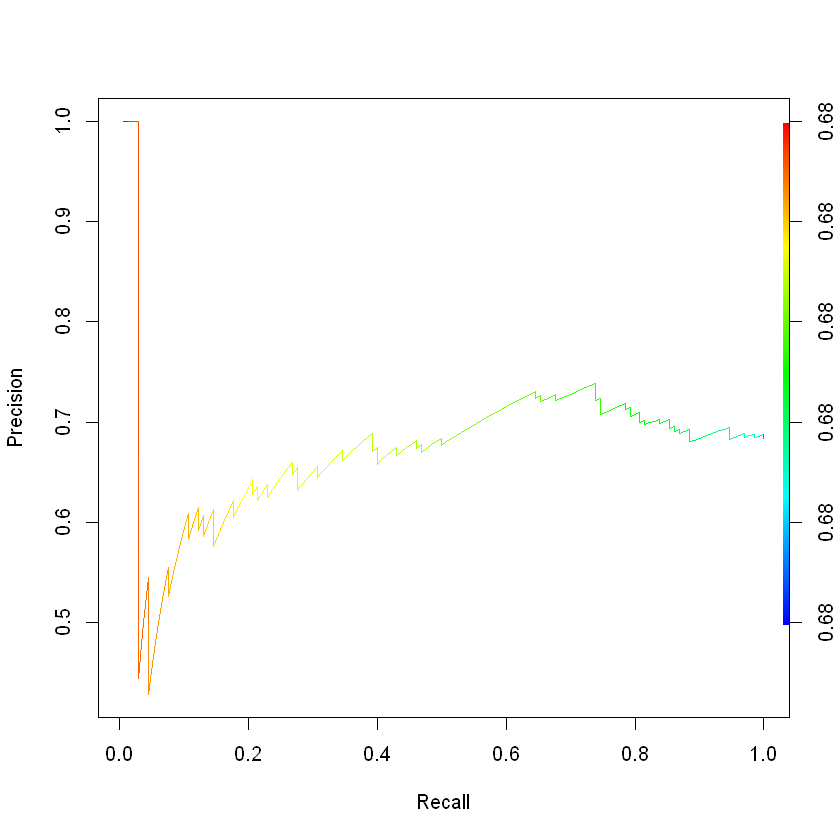

In [60]:
plot(perc.rec4,colorize=TRUE)

In [61]:
tpr.fpr4 <- performance(roc.ret.assessment4,"tpr","fpr")


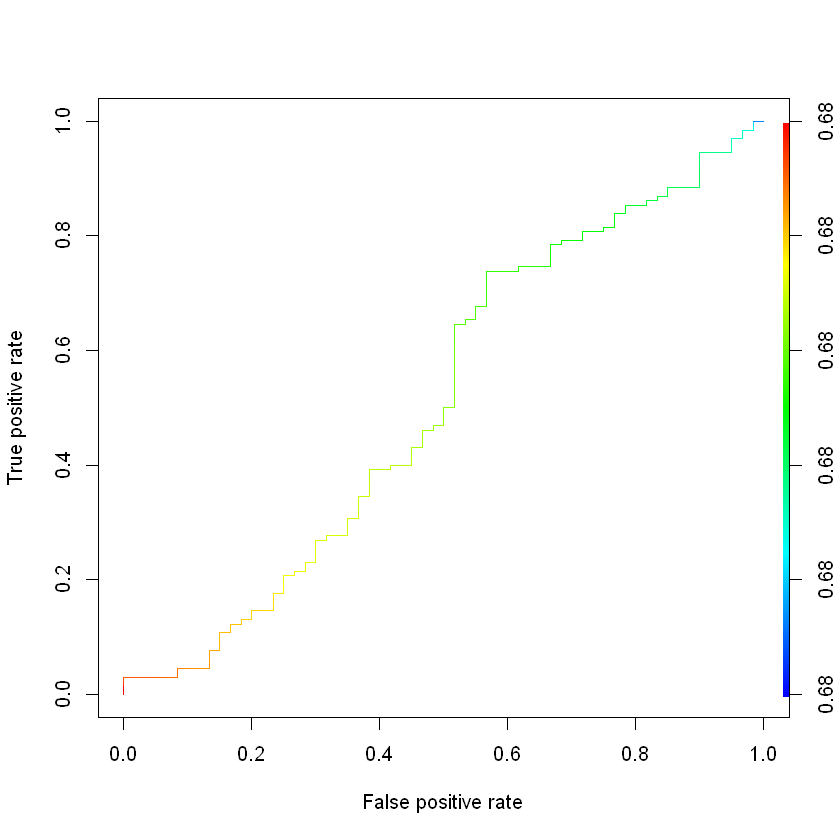

In [62]:
plot(tpr.fpr4,colorize=TRUE)


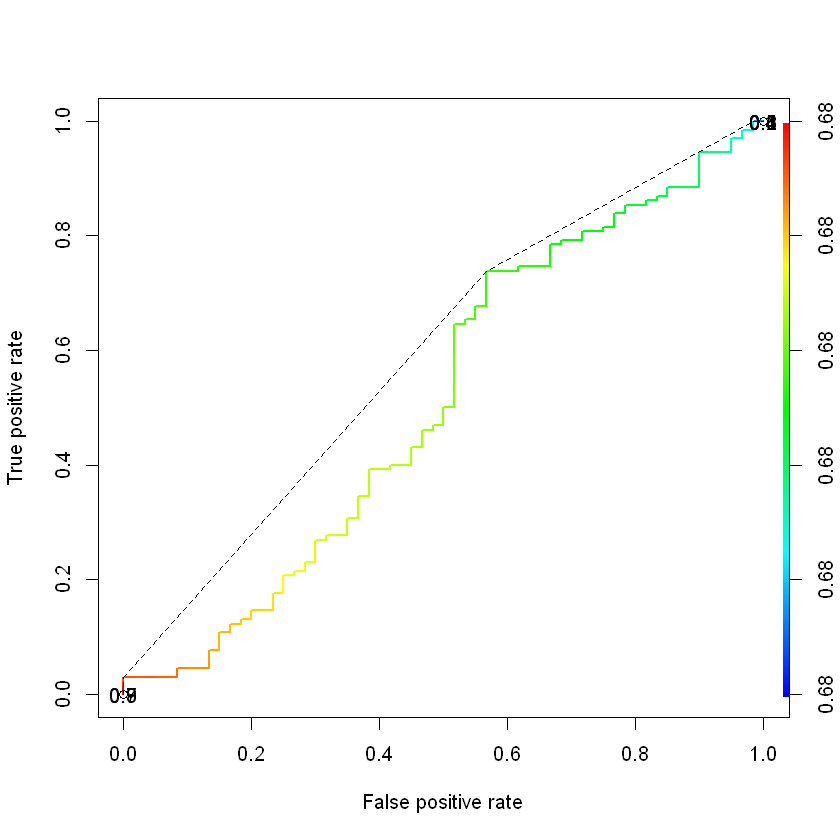

In [63]:
## Draw ROC curve
ROCR::plot(tpr.fpr4, colorize = TRUE, print.cutoffs.at = seq(0.1, 0.9, 0.1), lwd = 2)

## Draw convex hull of ROC curve
ch4 = ROCR::performance(roc.ret.assessment4, "rch")
ROCR::plot(ch4, add = TRUE, lty = 2)